<a href="https://colab.research.google.com/github/Malleshcr7/AI-ML-Projects/blob/main/YouTube_Comment_analyzer_with_ngrok_Interface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## YouTube Comment Sentiment Analysis Project

This notebook demonstrates a complete sentiment analysis system for YouTube comments using LSTM neural networks and FastAPI web interface.

### Project Overview:
- Train an LSTM model on Twitter sentiment data
- Save and load trained model for inference
- Fetch YouTube comments programmatically
- Analyze sentiments and display results
- Deploy web interface using FastAPI and ngrok

### Workflow:
1. Data preparation and model training
2. Model evaluation and visualization
3. Model persistence and loading
4. YouTube comment extraction
5. Web interface deployment

In [9]:
# STEP 1: Install required packages
!pip install -q tensorflow scikit-learn pandas numpy
!pip install youtube-comment-downloader pyngrok fastapi uvicorn nest-asyncio tensorflow


# STEP 2: Import Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import time

# STEP 3: Upload the CSV file
from google.colab import files
uploaded = files.upload()  # Upload your Tweets.csv file here

# STEP 4: Load and clean dataset
df = pd.read_csv('Tweets.csv')
df = df[df['airline_sentiment'].isin(['positive', 'negative', 'neutral'])]
df = df[['text', 'airline_sentiment']].dropna()

# Encode labels (0=negative, 1=neutral, 2=positive)
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['airline_sentiment'])

# STEP 5: Tokenize and pad text data
max_vocab = 10000
max_len = 50

tokenizer = Tokenizer(num_words=max_vocab, oov_token='<OOV>')
tokenizer.fit_on_texts(df['text'])

sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Prepare input and output
X = padded_sequences
y = to_categorical(df['label'], num_classes=3)

# STEP 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 7: Build LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_vocab, output_dim=64, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 sentiment classes
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# STEP 8: Train the model
start_time = time.time()
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))
end_time = time.time()
print(f"\n⏱️ Training completed in {(end_time - start_time):.2f} seconds.")

# STEP 9: Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {accuracy:.4f}")

# STEP 10: Make predictions
def predict_sentiment(tweet):
    seq = tokenizer.texts_to_sequences([tweet])
    padded = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')
    pred = model.predict(padded)
    label = label_encoder.inverse_transform([np.argmax(pred)])
    return label[0]



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 8.3 MB/s eta 0:00:00


Saving Tweets.csv to Tweets.csv


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 27s 63ms/step - accuracy: 0.6764 - loss: 0.7643 - val_accuracy: 0.7886 - val_loss: 0.5340
Epoch 2/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.8344 - loss: 0.4289 - val_accuracy: 0.8074 - val_loss: 0.5030
Epoch 3/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.8958 - loss: 0.3019 - val_accuracy: 0.7975 - val_loss: 0.5367
Epoch 4/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 40s 55ms/step - accuracy: 0.9265 - loss: 0.2180 - val_accuracy: 0.7807 - val_loss: 0.5887
Epoch 5/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9406 - loss: 0.1719 - val_accuracy: 0.7865 - val_loss: 0.6678

⏱️ Training completed in 149.74 seconds.
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7871 - loss: 0.6685
✅ Test Accuracy: 0.7865


## Testing Model


In [4]:
# Example predictions
print("Example 1:", predict_sentiment("I love the flight experience but i afraid but enjoyed."))
print("Example 2:", predict_sentiment("Worst service ever, very disappointed."))
print("Example 3:", predict_sentiment("It was okay, nothing special."))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Example 1: positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Example 2: negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Example 3: neutral


## Training and validation accuracy over epochs.

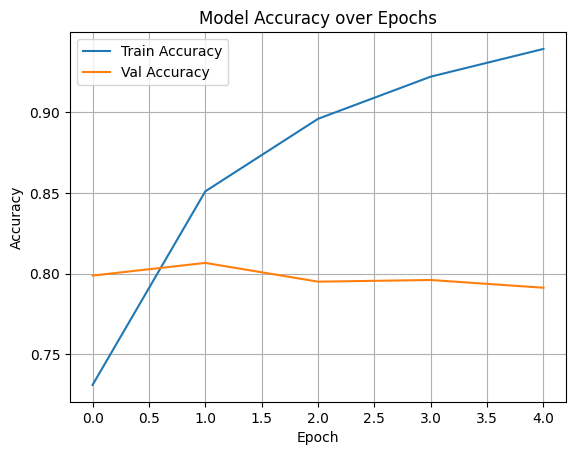

In [5]:
# Plot training and validation accuracy over epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


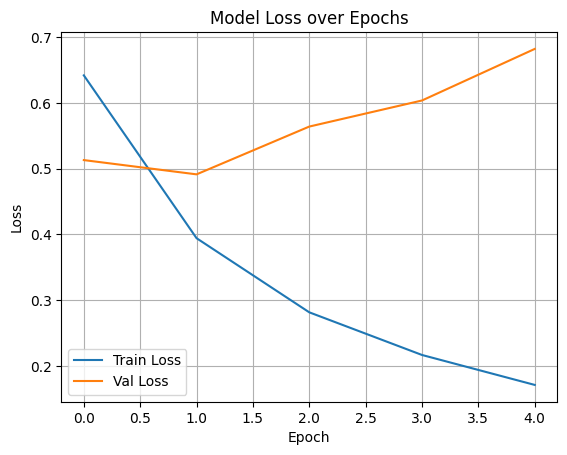

In [6]:
# Plot training and validation loss over epochs.
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [21]:

from youtube_comment_downloader import YoutubeCommentDownloader
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import tokenizer_from_json
import numpy as np
import json

# Load model
model = load_model("lstm_sentiment_model.h5")

# Load tokenizer
# Load tokenizer
with open("tokenizer.json") as f:
    tokenizer = tokenizer_from_json(f.read())


# Label mapping
label_map = {0: "negative", 1: "neutral", 2: "positive"}

# Function to predict a batch of comments
def predict_comments(comments):
    seq = tokenizer.texts_to_sequences(comments)
    padded = pad_sequences(seq, maxlen=50, padding='post', truncating='post')
    preds = model.predict(padded)
    labels = [label_map[np.argmax(p)] for p in preds]
    return labels

# Function to fetch and analyze YouTube comments
def analyze_video_comments(video_url, max_comments=100):
    downloader = YoutubeCommentDownloader()
    comments_data = downloader.get_comments_from_url(video_url, sort_by=0)  # ✅ fixed sort_by

    comments = [c['text'] for c in comments_data if 'text' in c][:max_comments]

    predictions = predict_comments(comments)

    from collections import Counter
    sentiment_counts = Counter(predictions)

    print("📊 Sentiment Counts:")
    print(sentiment_counts)

    return sentiment_counts


# Example Usage
video_url = "https://youtu.be/Dxn4HbIZUFs?si=gTVrTiAKnDNCXO8a"  # Replace with actual
result = analyze_video_comments(video_url)


3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step
📊 Sentiment Counts:
Counter({'neutral': 83, 'positive': 10, 'negative': 7})
